In [1]:
import finalExamUtilities as fEU

import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import scipy.linalg as sp_la
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# Overall Review <a class="anchor" id="review"></a>


Today we are going to load a dataset and use it to review each type of data analysis method we have looked at this semester.

Here's the scenario: You have been hired for the summer by a local realty company that manages apartment complexes. When someone applies to rent an apartment, the company collects information about the applicant, including information about debt, income and credit rating. The company has a shortage of staff to process applications, and is also dealing with a fair housing-related lawsuit. The company would like you to develop an automated solution for determining whether applicants are rent-worthy.

# Prepare The Data <a class="anchor" id="prepData"></a>

## 1. Load and look at your data <a class="anchor" id="loadData"></a>

* Where does the data come from? *This data set comes from https://www.kaggle.com/datasets/samuelcortinhas/credit-card-approval-clean-data which in turn comes from https://archive.ics.uci.edu/ml/datasets/Credit+Approval. It was originally contributed in Robert Quinlan in the late 1980s/early 1990s.*
  * What are the variables?
  * What are the types of the variables?
* Are there any ethical concerns with using this data? *This data set is about credit scoring, so (unless it's artificial, in which case we have different concerns!) it includes information about individuals.
  * We check whether any personally identifying information is in the data and no, there is none (no names, addresses, social security numbers, etc).
  * Even if no PII is in the data, there are sensitive features in the data such as age, gender and ethnicity. Models that use these features should be subject to extra scrutiny to make sure they are not biased in favor of one group of people over another. In our experiments today, we will *exclude these features*.
  * The data includes a label for credit-worthiness. Historically, human-made decisions about credit-worthiness (and rent-worthiness) have been notably subject to bias. So we should tell the realty company not to deploy any model we create as the sole decision maker.*

Referring to the cell below, which contains a report of the data with sensitive variables 'age', 'gender', 'ethnicity' and 'citizen' filtered out, please answer:

* How many data points are there?
* How many variables are there?
* What is the type of each variable?
  * syntactic types:
  * semantic types:
* Are the variables independent of each other? How do you make that assessment?
* Is there a value for each variable for each data point? 
* Do the values make sense? Are there outliers or other insanities?


Load the data
data columns
 ['debt', 'married', 'bankcustomer', 'yearsemployed', 'priordefault', 'employed', 'creditscore', 'driverslicense', 'zip', 'income', 'approved']

Inspect the data
data shape
 (690, 11) 
data type
 float64
missing data: none
data max, min, mean, std
           0         1         2          3         4         5          6   \
0  28.000000  1.000000  1.000000  28.500000  1.000000  1.000000  67.000000   
1   0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   0.000000   
2   4.758725  0.760870  0.763768   2.223406  0.523188  0.427536   2.400000   
3   4.974555  0.426553  0.424766   3.344087  0.499462  0.494721   4.859415   

         7            8              9         10  
0  1.000000  2000.000000  100000.000000  1.000000  
1  0.000000     0.000000       0.000000  0.000000  
2  0.457971   180.547826    1017.385507  0.444928  
3  0.498230   173.844212    5206.325793  0.496958  


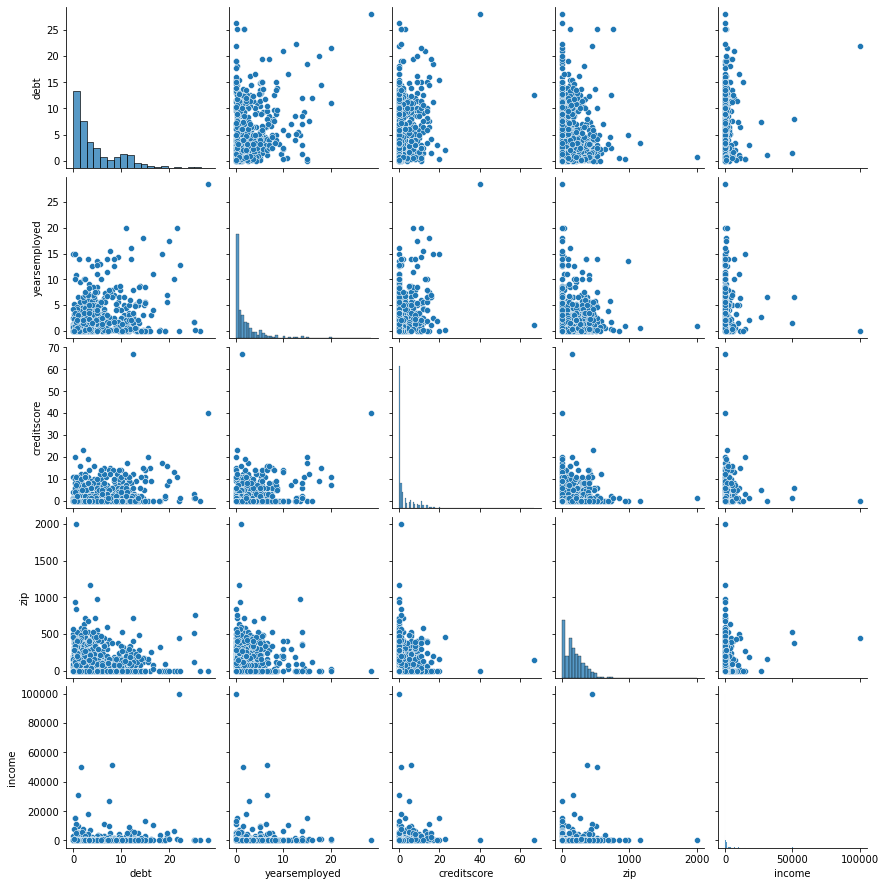


Transform the data
data shape 
 (690, 11) 
data max, min, mean, std
           0         1         2          3         4         5          6   \
0  28.000000  1.000000  1.000000  28.500000  1.000000  1.000000  67.000000   
1   0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   0.000000   
2   4.758725  0.760870  0.763768   2.223406  0.523188  0.427536   2.400000   
3   4.974555  0.426553  0.424766   3.344087  0.499462  0.494721   4.859415   

         7            8              9         10  
0  1.000000  2000.000000  100000.000000  1.000000  
1  0.000000     0.000000       0.000000  0.000000  
2  0.457971   180.547826    1017.385507  0.444928  
3  0.498230   173.844212    5206.325793  0.496958  
data shape 
 (690, 11) 
data max, min, mean, std
              0             1             2             3             4   \
0  4.672031e+00  5.606119e-01  5.561456e-01  7.857628e+00  9.546504e-01   
1 -9.566132e-01 -1.783765e+00 -1.798090e+00 -6.648767e-01 -1.047504e+00   
2  6

In [2]:
transformedData, columns = fEU.prepData(dataName="cc", type="clustering", fractionToKeep=1)

## 2. Consider Transforming/Normalizing the Data <a class="anchor" id="normalizeData"></a>

* Looking at this matrix, what transformation(s) is it doing?
$$\begin{pmatrix} \frac{1}{(max(data)-min(data))} & 0 & 0 & -min(var0) \\ 0 & \frac{1}{(max(data)-min(data))} & 0 & -min(var1) \\ 0 & 0 & \frac{1}{(max(data)-min(data))} & -min(var2) \end{pmatrix}$$
* Do we need to transform the credit-worthiness data? Why or why not?
* If we do need to transform it, what will we do?


Load the data
data columns
 ['debt', 'married', 'bankcustomer', 'yearsemployed', 'priordefault', 'employed', 'creditscore', 'driverslicense', 'zip', 'income', 'approved']

Inspect the data
data shape
 (690, 11) 
data type
 float64
missing data: none
data max, min, mean, std
           0         1         2          3         4         5          6   \
0  28.000000  1.000000  1.000000  28.500000  1.000000  1.000000  67.000000   
1   0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   0.000000   
2   4.758725  0.760870  0.763768   2.223406  0.523188  0.427536   2.400000   
3   4.974555  0.426553  0.424766   3.344087  0.499462  0.494721   4.859415   

         7            8              9         10  
0  1.000000  2000.000000  100000.000000  1.000000  
1  0.000000     0.000000       0.000000  0.000000  
2  0.457971   180.547826    1017.385507  0.444928  
3  0.498230   173.844212    5206.325793  0.496958  


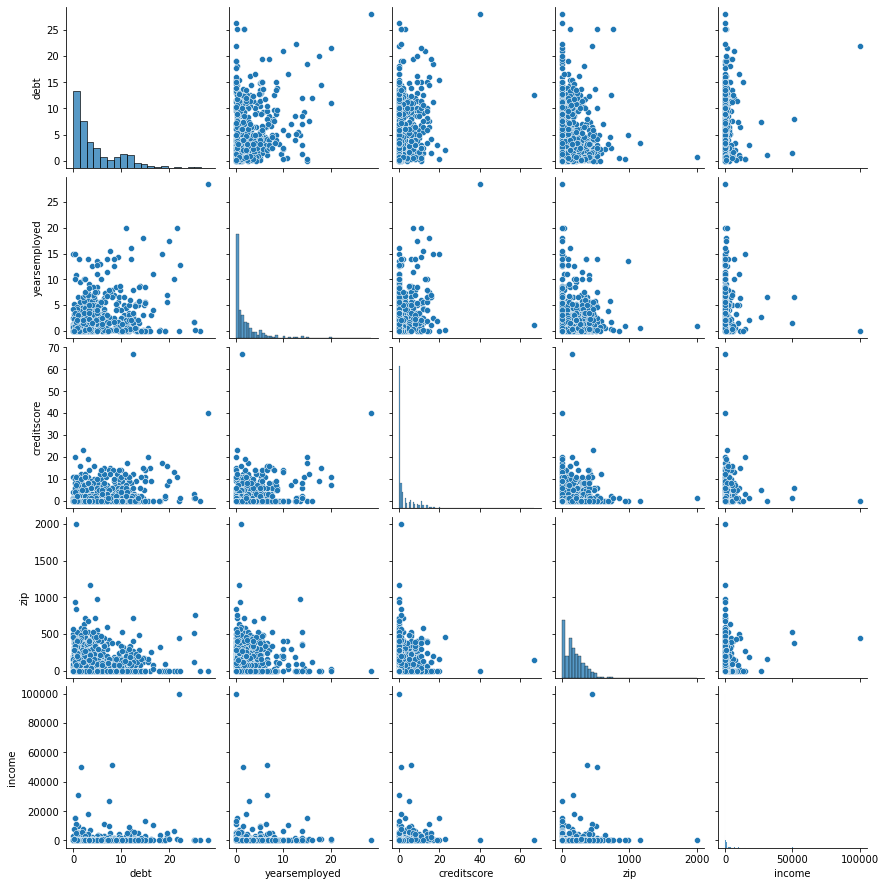


Split the data, dependent variable  10 , to keep  -1
10 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 2
training data shape 
 (551, 10) 
training data max, min, mean, std
            0         1         2          3         4         5          6  \
0  28.000000  1.000000  1.000000  28.500000  1.000000  1.000000  67.000000   
1   0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   0.000000   
2   4.830789  0.751361  0.754991   2.368875  0.551724  0.421053   2.450091   
3   5.006157  0.432224  0.430093   3.454676  0.497317  0.493728   5.134556   

          7            8              9  
0  1.000000  2000.000000  100000.000000  
1  0.000000     0.000000       0.000000  
2  0.450091   182.301270    1109.326679  
3  0.497503   179.484359    5762.338089  

dev data shape 
 (69, 10) 
dev data max, min, mean, std
            0         1         2          3         4         5          6  \
0  22.290000  1.000000  1.000000  16.000000  1.000000  1.000000  16.000000   
1   0.000000  0.000000  0.0

In [3]:
transformedTrain, transformedDev, transformedTest, trainY, devY, testY, columns = fEU.prepData(dataName="cc", type="classification", fractionToKeep=-1)

## 3. Consider Dimensionality Reduction <a class="anchor" id="pcaData"></a>

* In what circumstances do we want to use dimensionality reduction?
* What method do we use for dimensionality reduction?
* What are the steps in this method?
* One way to choose how many dimensions to keep is by looking at an elbow plot. Looking at the one below, how many dimensions should we keep for this data set in order to retain 80% of the cumulative explained variance?

['debt', 'married', 'bankcustomer', 'yearsemployed', 'priordefault', 'employed', 'creditscore', 'driverslicense', 'zip', 'income']
(551, 10)


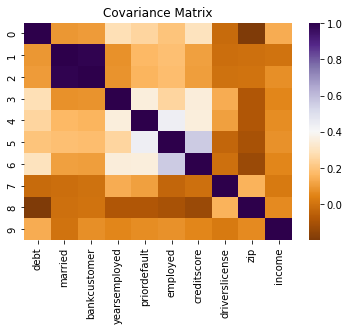

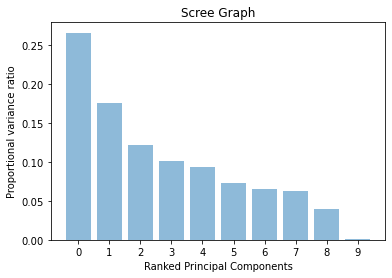

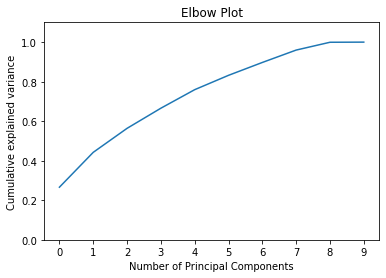

In [4]:
print(columns)
print(transformedTrain.shape)
pca = fEU.PCA(centered=True, plot=True)
pca.fit(transformedTrain, columns)
#projected = pca.project(transformedData, ??)

[Go back to the top](#review)


# Model <a class="anchor" id="model"></a>

* What would be a reasonable choice of dependent variable in this dataset, and why, for:
  * regression?
  * classification?
* What shall we split our data into, and why?
* What do we need to watch out for as we split our data?

## 4. Regression <a class="anchor" id="regression"></a>

* To fit a regression, the type of the dependent variable should be what?
* Name and define the loss function for regression.
* The normal equation is one method for fitting a linear regression. What is the normal equation? When can we *not* use it?
* If I have a lot of variables in my data, how can I effectively decide which to include in my regression?
* What are the scores for the regressions below, and what do they mean (in terms of explanation of relationship between the variables, and in terms of using the model for prediction)?


Load the data
data columns
 ['debt', 'married', 'bankcustomer', 'yearsemployed', 'priordefault', 'employed', 'creditscore', 'driverslicense', 'zip', 'income']

Inspect the data
data shape
 (690, 10) 
data type
 float64
missing data: none
data max, min, mean, std
            0         1         2          3         4         5          6  \
0  28.000000  1.000000  1.000000  28.500000  1.000000  1.000000  67.000000   
1   0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   0.000000   
2   4.758725  0.760870  0.763768   2.223406  0.523188  0.427536   2.400000   
3   4.974555  0.426553  0.424766   3.344087  0.499462  0.494721   4.859415   

          7            8              9  
0  1.000000  2000.000000  100000.000000  
1  0.000000     0.000000       0.000000  
2  0.457971   180.547826    1017.385507  
3  0.498230   173.844212    5206.325793  


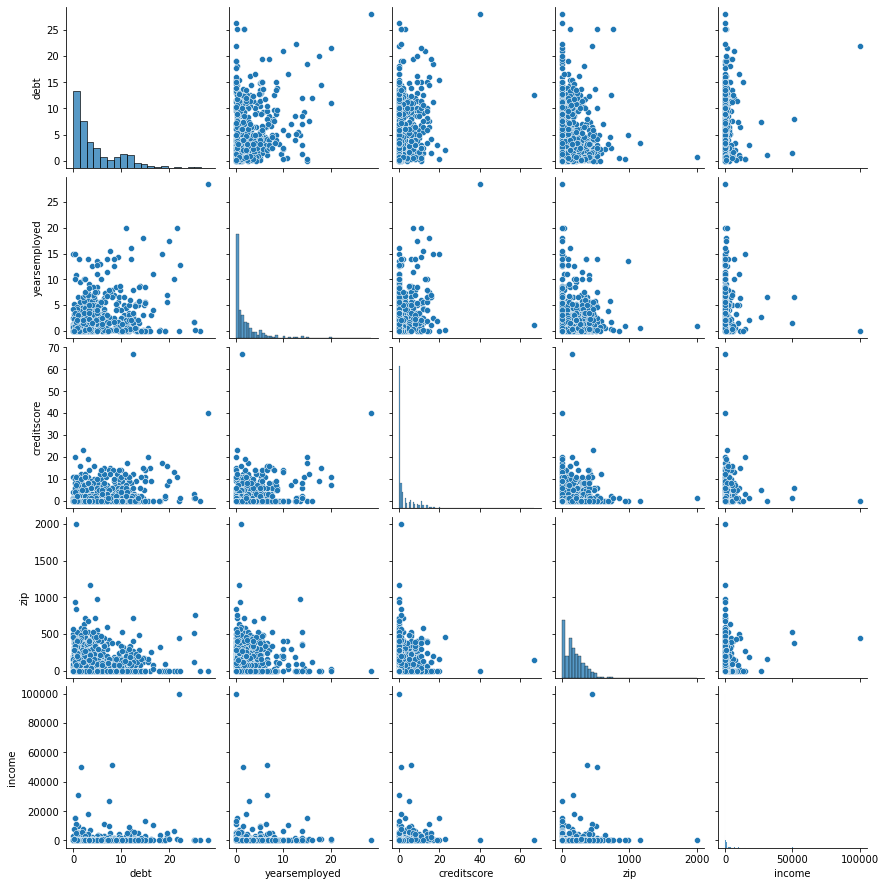


Split the data, dependent variable  6 , to keep  -1
6 [0, 1, 2, 3, 4, 5, 7, 8, 9] 240
training data shape 
 (378, 9) 
training data max, min, mean, std
            0         1         2          3         4         5         6  \
0  28.000000  1.000000  1.000000  28.500000  1.000000  1.000000  1.000000   
1   0.000000  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
2   4.488069  0.748677  0.751323   2.388254  0.531746  0.359788  0.484127   
3   4.721430  0.433774  0.432246   3.534227  0.498991  0.479938  0.499748   

             7            8  
0  2000.000000  5000.000000  
1     0.000000     0.000000  
2   189.121693   158.656085  
3   190.640458   595.773126  

dev data shape 
 (41, 9) 
dev data max, min, mean, std
            0         1         2          3         4         5         6  \
0  20.000000  1.000000  1.000000  17.500000  1.000000  1.000000  1.000000   
1   0.000000  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
2   5.213171  0.756098

In [5]:
transformedTrain, transformedDev, transformedTest, trainY, devY, testY, columns = fEU.prepData(dataName="cc", type="regression", fractionToKeep=-1)

In [6]:
%%time

# Linear regression on the transformed data

lr = LinearRegression().fit(transformedTrain, trainY)
print(lr.score(transformedDev, devY))
print(lr.predict(transformedDev))

0.4167919247896583
[-0.78530247 -0.74623382  0.01529859 -0.78721435  0.12666109 -0.3770231
  0.63956378  5.5309351   5.93528984  0.3718103   3.90102071 -0.64574411
 -0.61994739  4.13820647  2.9871488  -0.74165159  1.61167179  0.26202034
  7.3357898  -0.62750417 -1.05694945 -0.5064659  -0.76937774 -0.85728959
 -0.25528119 -0.61093717 -0.54754475  0.51953007 -0.94351486  5.26342488
  4.40737604 -0.55315302  0.33090485  4.00819083 -0.21818178  3.62905108
 -0.20933121  0.19123472  3.63420465  4.55522388 11.13255057]
Wall time: 9.07 ms


In [7]:
%%time

# Polynomial regresson the transformed data, degree 2

pf = PolynomialFeatures(degree = 2, include_bias = False, interaction_only = True)
polynomial2Train = pf.fit_transform(transformedTrain)
lr = LinearRegression().fit(polynomial2Train, trainY)
polynomial2Dev = pf.fit_transform(transformedDev)
print(lr.score(polynomial2Dev, devY))

0.4627568032950793
Wall time: 9.75 ms


In [8]:
%%time

# Polynomial regresson the transformed data, degree 3

pf = PolynomialFeatures(degree = 3, include_bias = False, interaction_only = True)
polynomial3Train = pf.fit_transform(transformedTrain)
lr = LinearRegression().fit(polynomial3Train, trainY)
polynomial3Dev = pf.fit_transform(transformedDev)
print(lr.score(polynomial3Dev, devY))

-0.0691256785943819
Wall time: 11.2 ms


[Go back to the top](#review)

## 5. Clustering <a class="anchor" id="clustering"></a>

* In what circumstances would we want to cluster our data?
* Clustering requires a distance metric. Name and define a distance metric *other than Euclidean distance*.
* For k-means clustering, we minimize *inertia*. Define inertia.
* k-means clustering is sensitive to the structure of the input data. In what way? How can we fix this type of issue with data structure?
* One way to choose $k$ is by inspecting an elbow plot. Looking at the one below, what would be a good value for $k$ for this data? Why?
* Looking at the two scatter plots - one from the original data and one from the PCA projected data - which is clearer to you? Why?


Load the data
data columns
 ['debt', 'married', 'bankcustomer', 'yearsemployed', 'priordefault', 'employed', 'creditscore', 'driverslicense', 'zip', 'income', 'approved']

Inspect the data
data shape
 (690, 11) 
data type
 float64
missing data: none
data max, min, mean, std
           0         1         2          3         4         5          6   \
0  28.000000  1.000000  1.000000  28.500000  1.000000  1.000000  67.000000   
1   0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   0.000000   
2   4.758725  0.760870  0.763768   2.223406  0.523188  0.427536   2.400000   
3   4.974555  0.426553  0.424766   3.344087  0.499462  0.494721   4.859415   

         7            8              9         10  
0  1.000000  2000.000000  100000.000000  1.000000  
1  0.000000     0.000000       0.000000  0.000000  
2  0.457971   180.547826    1017.385507  0.444928  
3  0.498230   173.844212    5206.325793  0.496958  


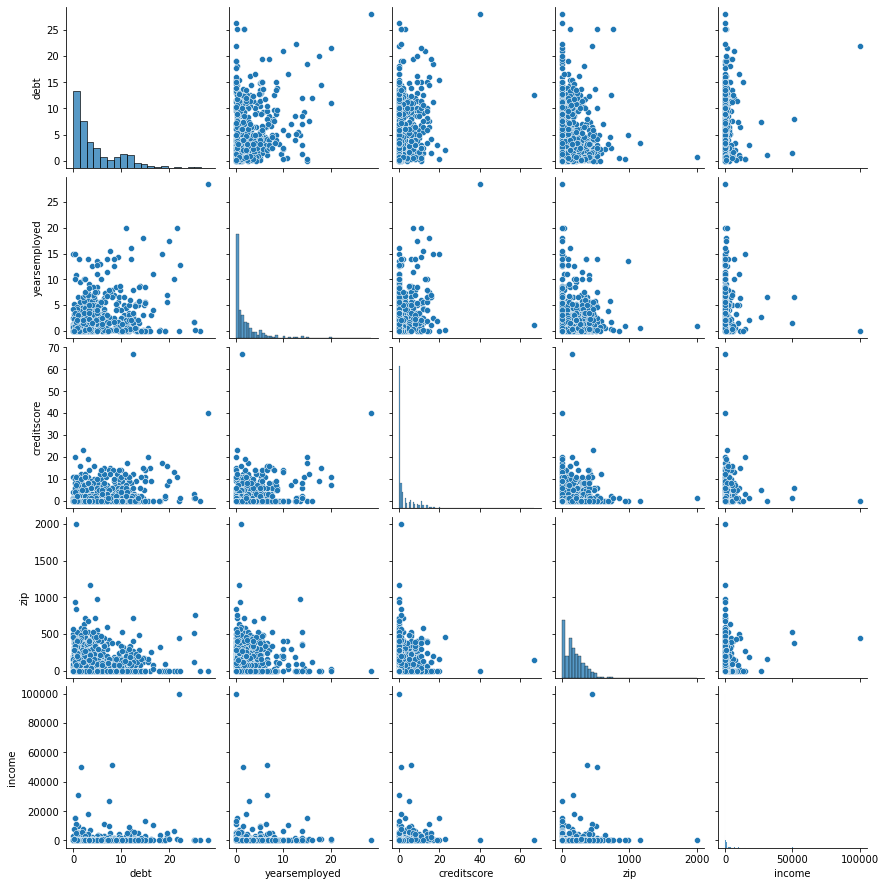


Transform the data
data shape 
 (690, 11) 
data max, min, mean, std
           0         1         2          3         4         5          6   \
0  28.000000  1.000000  1.000000  28.500000  1.000000  1.000000  67.000000   
1   0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   0.000000   
2   4.758725  0.760870  0.763768   2.223406  0.523188  0.427536   2.400000   
3   4.974555  0.426553  0.424766   3.344087  0.499462  0.494721   4.859415   

         7            8              9         10  
0  1.000000  2000.000000  100000.000000  1.000000  
1  0.000000     0.000000       0.000000  0.000000  
2  0.457971   180.547826    1017.385507  0.444928  
3  0.498230   173.844212    5206.325793  0.496958  
data shape 
 (690, 11) 
data max, min, mean, std
              0             1             2             3             4   \
0  4.672031e+00  5.606119e-01  5.561456e-01  7.857628e+00  9.546504e-01   
1 -9.566132e-01 -1.783765e+00 -1.798090e+00 -6.648767e-01 -1.047504e+00   
2  6

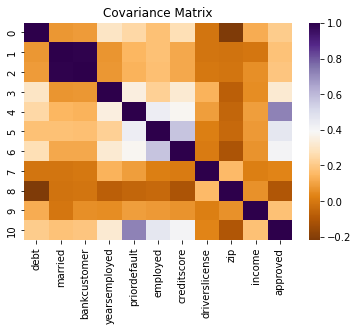

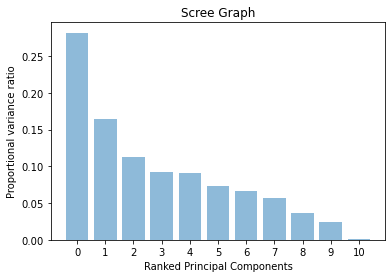

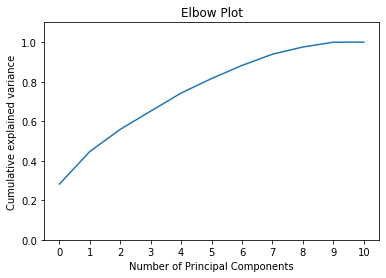

In [9]:
transformedData, columns = fEU.prepData(dataName="cc", type="clustering", fractionToKeep=1)
projectedData, _ = fEU.projectData(transformedData, 3, columns)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38


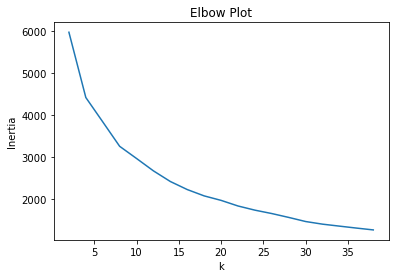

Wall time: 5.68 s


In [10]:
%%time

# Clustering on the transformed data, choose k

fEU.fitExploreKMeans(transformedData, 2, 40, 2)

Wall time: 287 ms


<AxesSubplot:>

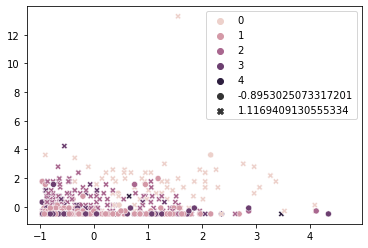

In [11]:
%%time

# Clustering on the transformed data, best k
km = KMeans(n_clusters=5, random_state=0).fit(transformedData)
sns.scatterplot(x=transformedData[:, 0], y=transformedData[:, 6], hue=km.labels_, style=transformedData[:, -1])

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38


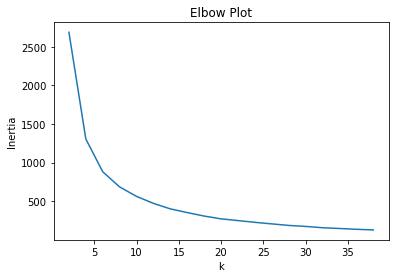

Wall time: 4.35 s


In [12]:
%%time

# Clustering on the PCA projected data, choose k

fEU.fitExploreKMeans(projectedData, 2, 40, 2)

Wall time: 279 ms


<AxesSubplot:>

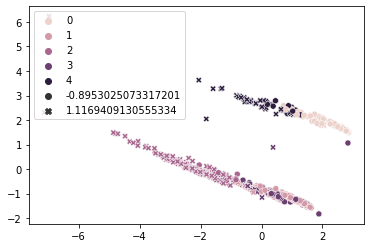

In [13]:
%%time

# Clustering on the PCA projected data, best k
km = KMeans(n_clusters=5, random_state=0).fit(projectedData)
sns.scatterplot(x=projectedData[:, 0], y=projectedData[:, 1], hue=km.labels_, style=transformedData[:, -1])

[Go back to the top](#review)

# Classification <a class="anchor" id="classification"></a>

* To train a classifier, the type of the dependent variable should be what?
* We will use "credit-worthy" as a proxy for "rent-worthy". How many values does this variable have?
* How do we know how well a classification model works?

## 6. K-nearest neighbors <a class="anchor" id="knn"></a>

* How does the *fit* function work for k-nearest neighbors?
* How does the *predict* function work?
* One way to choose a value of $k$ is by looking at an elbow plot. Looking at the elbow plot below, what value of k would you choose for this data and why?


Load the data
data columns
 ['debt', 'married', 'bankcustomer', 'yearsemployed', 'priordefault', 'employed', 'creditscore', 'driverslicense', 'zip', 'income', 'approved']

Inspect the data
data shape
 (690, 11) 
data type
 float64
missing data: none
data max, min, mean, std
           0         1         2          3         4         5          6   \
0  28.000000  1.000000  1.000000  28.500000  1.000000  1.000000  67.000000   
1   0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   0.000000   
2   4.758725  0.760870  0.763768   2.223406  0.523188  0.427536   2.400000   
3   4.974555  0.426553  0.424766   3.344087  0.499462  0.494721   4.859415   

         7            8              9         10  
0  1.000000  2000.000000  100000.000000  1.000000  
1  0.000000     0.000000       0.000000  0.000000  
2  0.457971   180.547826    1017.385507  0.444928  
3  0.498230   173.844212    5206.325793  0.496958  


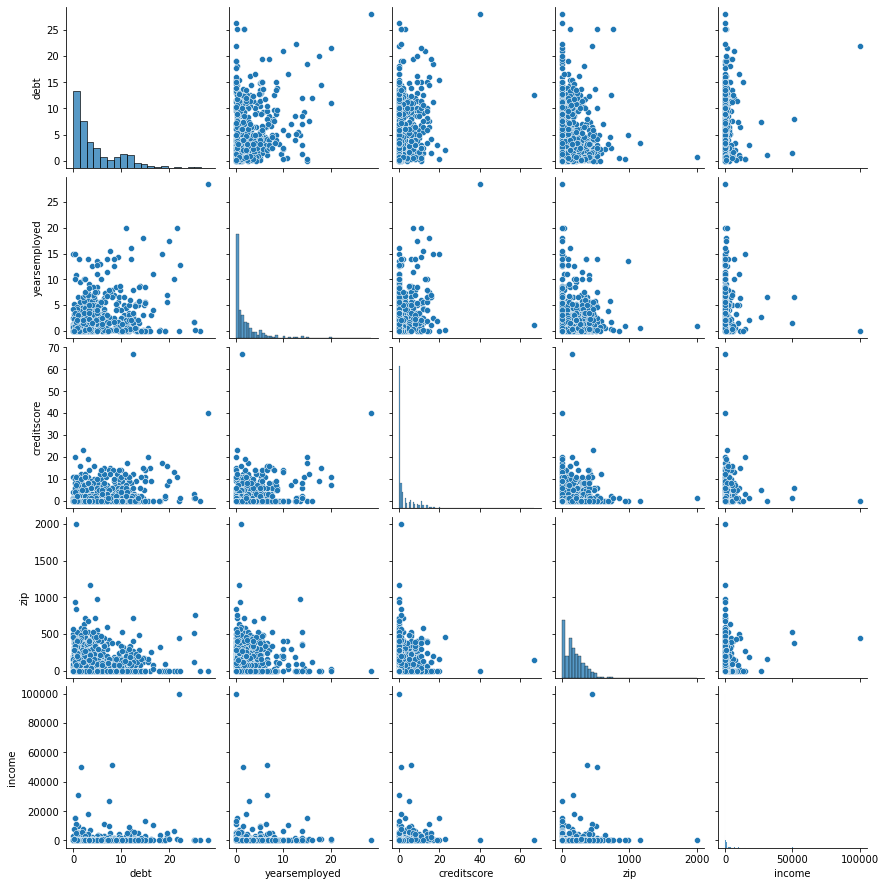


Split the data, dependent variable  10 , to keep  -1
10 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 2
training data shape 
 (551, 10) 
training data max, min, mean, std
            0         1         2          3         4         5          6  \
0  28.000000  1.000000  1.000000  28.500000  1.000000  1.000000  67.000000   
1   0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   0.000000   
2   4.830789  0.751361  0.754991   2.368875  0.551724  0.421053   2.450091   
3   5.006157  0.432224  0.430093   3.454676  0.497317  0.493728   5.134556   

          7            8              9  
0  1.000000  2000.000000  100000.000000  
1  0.000000     0.000000       0.000000  
2  0.450091   182.301270    1109.326679  
3  0.497503   179.484359    5762.338089  

dev data shape 
 (69, 10) 
dev data max, min, mean, std
            0         1         2          3         4         5          6  \
0  22.290000  1.000000  1.000000  16.000000  1.000000  1.000000  16.000000   
1   0.000000  0.000000  0.0

In [14]:
transformedTrain, transformedDev, transformedTest, trainY, devY, testY, columns = fEU.prepData(dataName="cc", type="classification", fractionToKeep=-1)

2
4
6
8
10
12
14
16
18
20
22
24
26
28


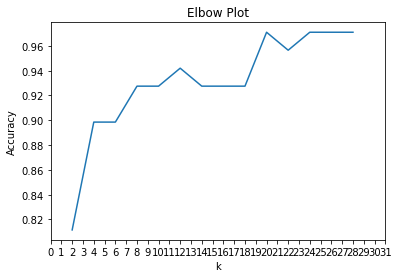

Wall time: 652 ms


In [15]:
%%time

# Fit a kNN to the transformed train data, choose k using dev data; this is hyperparameter tuning

fEU.fitExploreKNN(transformedTrain, trainY, transformedDev, devY, 2, 30, 2)

In [17]:
%%time

# Fit a kNN to the transformed train data, best k, test using test data

knn = KNeighborsClassifier(n_neighbors=4).fit(transformedTrain, trainY)
print(knn.score(transformedTest, testY))
print(confusion_matrix(testY, knn.predict(transformedTest)))

0.7857142857142857
[[38  1]
 [14 17]]
Wall time: 16.6 ms


## 7.  Naive Bayes <a class="anchor" id="nb"></a>

* State Bayes rule.
* In Bayes rule, which parts are the posterior, prior, likelihood and evidence?
* Why do we call a Naive Bayes model "naive"? What does this allow us to do?
* A simple Naive Bayes model is based on relative frequencies of values of the variables in the training data. 
  * How can we account for values of variables we may not see for a particular class at train time?
  * The estimated probabilities output via this method, for any non-trivial number of variable values, will be very small. How can we handle this?
  * If a variable is quantitative (continuous or discrete) we can fit a Naive Bayes model using a probability density function for the variable. Name and define a probability distribution commonly used in this way.


Load the data
data columns
 ['debt', 'married', 'bankcustomer', 'yearsemployed', 'priordefault', 'employed', 'creditscore', 'driverslicense', 'zip', 'income', 'approved']

Inspect the data
data shape
 (690, 11) 
data type
 float64
missing data: none
data max, min, mean, std
           0         1         2          3         4         5          6   \
0  28.000000  1.000000  1.000000  28.500000  1.000000  1.000000  67.000000   
1   0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   0.000000   
2   4.758725  0.760870  0.763768   2.223406  0.523188  0.427536   2.400000   
3   4.974555  0.426553  0.424766   3.344087  0.499462  0.494721   4.859415   

         7            8              9         10  
0  1.000000  2000.000000  100000.000000  1.000000  
1  0.000000     0.000000       0.000000  0.000000  
2  0.457971   180.547826    1017.385507  0.444928  
3  0.498230   173.844212    5206.325793  0.496958  


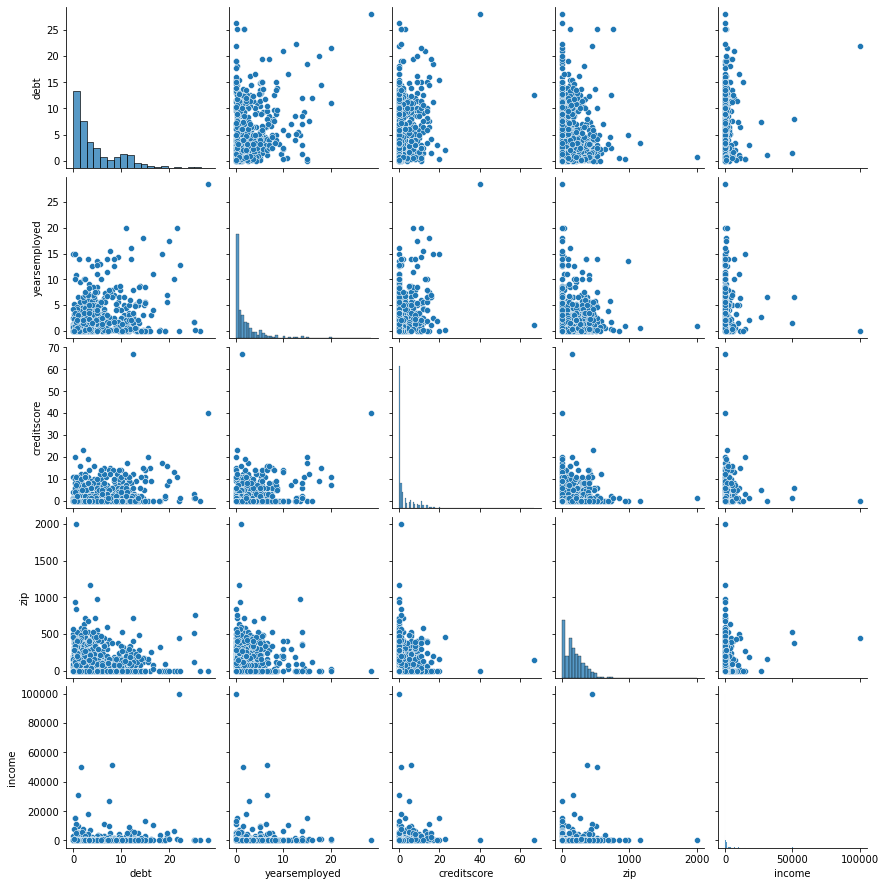


Split the data, dependent variable  10 , to keep  -1
10 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 2
training data shape 
 (551, 10) 
training data max, min, mean, std
            0         1         2          3         4         5          6  \
0  28.000000  1.000000  1.000000  28.500000  1.000000  1.000000  67.000000   
1   0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   0.000000   
2   4.830789  0.751361  0.754991   2.368875  0.551724  0.421053   2.450091   
3   5.006157  0.432224  0.430093   3.454676  0.497317  0.493728   5.134556   

          7            8              9  
0  1.000000  2000.000000  100000.000000  
1  0.000000     0.000000       0.000000  
2  0.450091   182.301270    1109.326679  
3  0.497503   179.484359    5762.338089  

dev data shape 
 (69, 10) 
dev data max, min, mean, std
            0         1         2          3         4         5          6  \
0  22.290000  1.000000  1.000000  16.000000  1.000000  1.000000  16.000000   
1   0.000000  0.000000  0.0

In [18]:
transformedTrain, transformedDev, transformedTest, trainY, devY, testY, columns = fEU.prepData(dataName="cc", type="classification", fractionToKeep=-1)

0.8142857142857143
[[38  1]
 [12 19]]


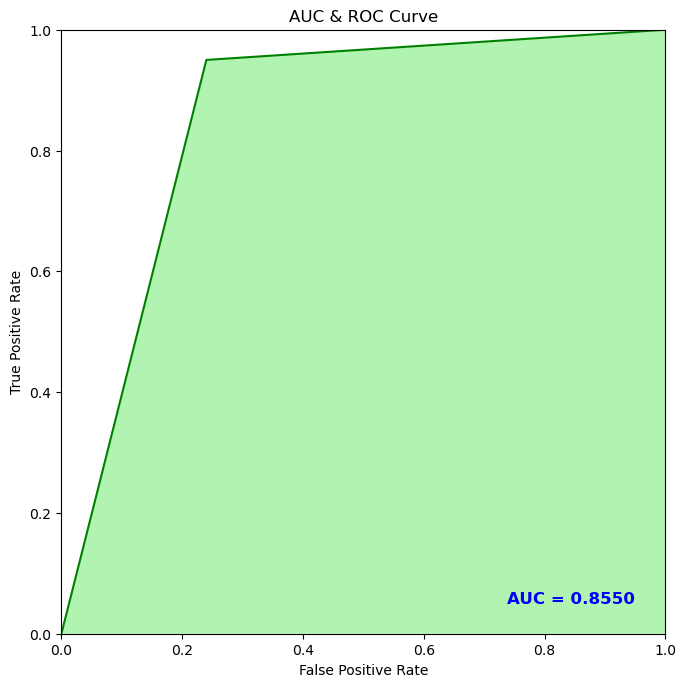

Wall time: 370 ms


In [19]:
%%time

# Fit a naive Bayes model to the transformed train data, test using test data

gnb = GaussianNB().fit(transformedTrain, trainY)
print(gnb.score(transformedTest, testY))
print(confusion_matrix(testY, gnb.predict(transformedTest)))
fEU.aucRoc(gnb.predict(transformedTest), testY)

[Go back to the top](#review)

## Evaluation and Visualization <a class="anchor" id="classificationEvaluation"></a>

* In addition to accuracy, we often create confusion matrices for a classifier.
  * Draw a confusion matrix and label the cells corresponding to true positives, true negatives, false positives and false negatives
  * Looking at the confusion matrix above, what can we say about the classes in this model?
  * Define true positive rate and false positive rate.
  * What is a ROC curve? How is it related to AUC?
  * For a multiclass classifier, what is a variant on the vanilla confusion matrix that we can use?

[Go back to the top](#review)

# 8. RBF Networks <a class="anchor" id="rbfNetworks"></a>

* What is a radial basis function?
* What is the structure of a RBF network?
* In this course, what type of activation function did we define for the hidden nodes?
* What are the steps to training a RBF network?
* For what types of modeling can we use a RBF network?

Let's think about training a RBF network to determine whether an applicant is "rent-worthy".
* How many nodes will be in the input layer?
* How many nodes will be in the output layer?
* Thinking about the k-means clustering we trained on this data earlier, how many nodes would you put in the hidden layer?

## A Worked Example for Regression <a class="anchor" id="rbfRegression"></a>

Which is more accurate, linear regression (see earlier) or regression via RBF network?


Load the data
data columns
 ['debt', 'married', 'bankcustomer', 'yearsemployed', 'priordefault', 'employed', 'creditscore', 'driverslicense', 'zip', 'income']

Inspect the data
data shape
 (690, 10) 
data type
 float64
missing data: none
data max, min, mean, std
            0         1         2          3         4         5          6  \
0  28.000000  1.000000  1.000000  28.500000  1.000000  1.000000  67.000000   
1   0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   0.000000   
2   4.758725  0.760870  0.763768   2.223406  0.523188  0.427536   2.400000   
3   4.974555  0.426553  0.424766   3.344087  0.499462  0.494721   4.859415   

          7            8              9  
0  1.000000  2000.000000  100000.000000  
1  0.000000     0.000000       0.000000  
2  0.457971   180.547826    1017.385507  
3  0.498230   173.844212    5206.325793  


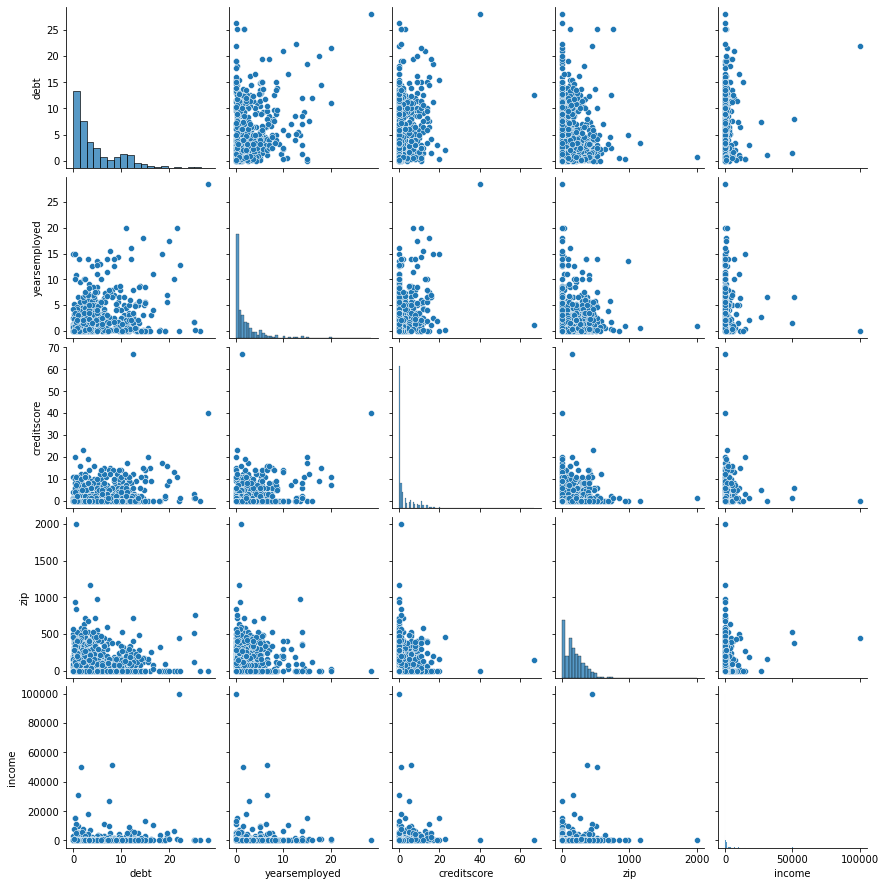


Split the data, dependent variable  6 , to keep  -1
6 [0, 1, 2, 3, 4, 5, 7, 8, 9] 240
training data shape 
 (378, 9) 
training data max, min, mean, std
            0         1         2          3         4         5         6  \
0  28.000000  1.000000  1.000000  28.500000  1.000000  1.000000  1.000000   
1   0.000000  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
2   4.488069  0.748677  0.751323   2.388254  0.531746  0.359788  0.484127   
3   4.721430  0.433774  0.432246   3.534227  0.498991  0.479938  0.499748   

             7            8  
0  2000.000000  5000.000000  
1     0.000000     0.000000  
2   189.121693   158.656085  
3   190.640458   595.773126  

dev data shape 
 (41, 9) 
dev data max, min, mean, std
            0         1         2          3         4         5         6  \
0  20.000000  1.000000  1.000000  17.500000  1.000000  1.000000  1.000000   
1   0.000000  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
2   5.213171  0.756098

In [20]:
transformedTrain, transformedDev, transformedTest, trainY, devY, testY, columns = fEU.prepData(dataName="cc", type="regression", fractionToKeep=-1)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


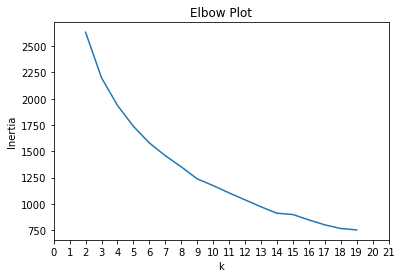

Wall time: 3.39 s


In [21]:
%%time

# Get the number of prototypes; this is hyperparameter tuning

rbf = fEU.RBFNetwork(type="regression")
rbf.explorePrototypes(transformedTrain, 2, 20, 1)

In [22]:
%%time

rbf.fit(transformedTrain, trainY, 15)
yhat = rbf.predict(transformedDev)
rbf.score(devY, yhat)

Wall time: 375 ms


0.43876920550577203

## A Worked Example for Classification <a class="anchor" id="rbfClassification"></a>

Which is most accurate, kNN classification, Naive Bayes classification, or classification via RBF network?


Load the data
data columns
 ['debt', 'married', 'bankcustomer', 'yearsemployed', 'priordefault', 'employed', 'creditscore', 'driverslicense', 'zip', 'income', 'approved']

Inspect the data
data shape
 (690, 11) 
data type
 float64
missing data: none
data max, min, mean, std
           0         1         2          3         4         5          6   \
0  28.000000  1.000000  1.000000  28.500000  1.000000  1.000000  67.000000   
1   0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   0.000000   
2   4.758725  0.760870  0.763768   2.223406  0.523188  0.427536   2.400000   
3   4.974555  0.426553  0.424766   3.344087  0.499462  0.494721   4.859415   

         7            8              9         10  
0  1.000000  2000.000000  100000.000000  1.000000  
1  0.000000     0.000000       0.000000  0.000000  
2  0.457971   180.547826    1017.385507  0.444928  
3  0.498230   173.844212    5206.325793  0.496958  


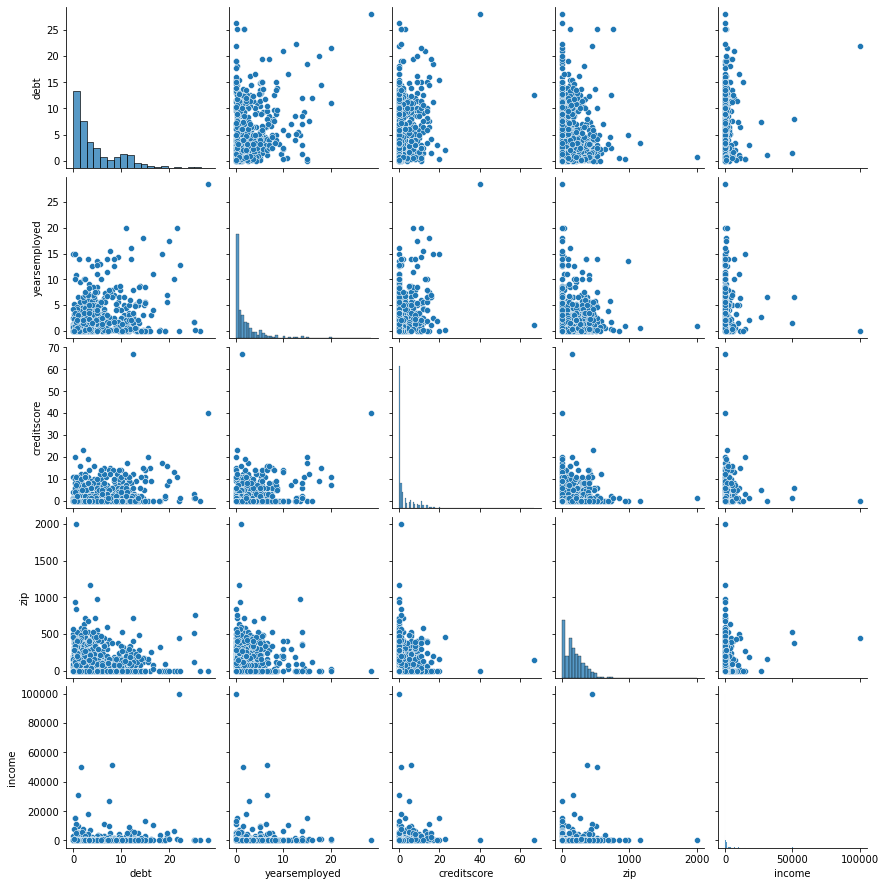


Split the data, dependent variable  10 , to keep  -1
10 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 2
training data shape 
 (551, 10) 
training data max, min, mean, std
            0         1         2          3         4         5          6  \
0  28.000000  1.000000  1.000000  28.500000  1.000000  1.000000  67.000000   
1   0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   0.000000   
2   4.830789  0.751361  0.754991   2.368875  0.551724  0.421053   2.450091   
3   5.006157  0.432224  0.430093   3.454676  0.497317  0.493728   5.134556   

          7            8              9  
0  1.000000  2000.000000  100000.000000  
1  0.000000     0.000000       0.000000  
2  0.450091   182.301270    1109.326679  
3  0.497503   179.484359    5762.338089  

dev data shape 
 (69, 10) 
dev data max, min, mean, std
            0         1         2          3         4         5          6  \
0  22.290000  1.000000  1.000000  16.000000  1.000000  1.000000  16.000000   
1   0.000000  0.000000  0.0

In [23]:
transformedTrain, transformedDev, transformedTest, trainY, devY, testY, columns = fEU.prepData(dataName="cc", type="classification", fractionToKeep=-1)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


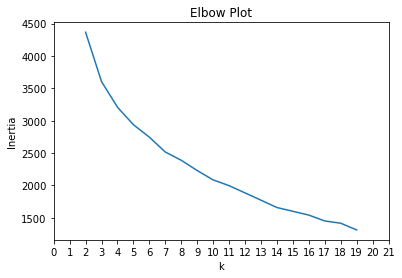

Wall time: 4.43 s


In [24]:
%%time

# Get the number of prototypes; this is hyperparameter tuning

rbf = fEU.RBFNetwork(type="classification")
rbf.explorePrototypes(transformedTrain, 2, 20, 1)

[[38  1]
 [10 21]]


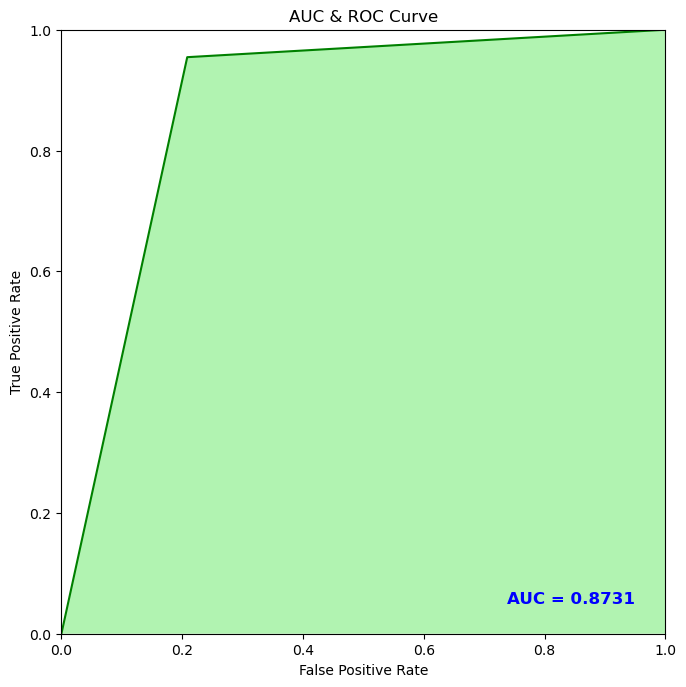

Wall time: 829 ms


In [27]:
%%time

rbf.fit(transformedTrain, trainY, 15)
yhat = rbf.predict(transformedTest)
rbf.score(testY, yhat)
print(confusion_matrix(testY, yhat))
fEU.aucRoc(yhat, testY)